In [5]:
import pandas as pd
import numpy as np
## Setting pandas print option to print decimal values upto
## 4 decimal places
np.set_printoptions(precision=4, linewidth=100)

In [9]:
house_data = pd.read_csv('housing.csv')
house_data

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [10]:
house_data.head(10)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
5,6.430,5.21,18.7,602700.0
6,6.012,12.43,15.2,480900.0
7,6.172,19.15,15.2,569100.0
8,5.631,29.93,15.2,346500.0
9,6.004,17.10,15.2,396900.0


In [11]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [14]:
X = sm.add_constant(house_data['RM'])
X.head(5)


,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [15]:
Y = house_data['MEDV']
Y.head(5)

,MEDV
0,504000.0
1,453600.0
2,728700.0
3,701400.0
4,760200.0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, random_state=100)

In [18]:
house_data_model = sm.OLS(train_Y, train_X).fit()

In [19]:
print(house_data_model.params)

const   -650375.885646
RM       177214.598044
dtype: float64


In [20]:
print(house_data_model.rsquared)

0.478039081242992


In [21]:
print(house_data_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     356.3
Date:                Mon, 17 Mar 2025   Prob (F-statistic):           7.02e-57
Time:                        06:06:50   Log-Likelihood:                -5108.9
No. Observations:                 391   AIC:                         1.022e+04
Df Residuals:                     389   BIC:                         1.023e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.504e+05    5.9e+04    -11.019      0.0

In [22]:
# Make predictions on the test data
predictions = house_data_model.predict(test_X)

# Create a DataFrame to compare actual and predicted values
results = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions})
results.head(10)  # Display the first 10 rows of actual vs predicted values

,Actual,Predicted
244,621600.0,582506.072943
352,352800.0,378000.426801
265,672000.0,564252.969345
97,812700.0,779568.705968
310,485100.0,479544.391480
111,478800.0,539620.140217
103,405300.0,437190.102548
175,781200.0,586582.008698
383,117600.0,410607.912841
90,474600.0,486810.190000


In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(test_Y, predictions)
r2 = r2_score(test_Y, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 17768106190.86592
R-squared (R²): 0.5037564372454297


In [26]:
# Residual Analysis
residuals = test_Y - predictions
residuals.head(10)


,0
244,39093.927057
352,-25200.426801
265,107747.030655
97,33131.294032
310,5555.608520
111,-60820.140217
103,-31890.102548
175,194617.991302
383,-293007.912841
90,-12210.190000


In [27]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = house_data_model.predict(test_X)


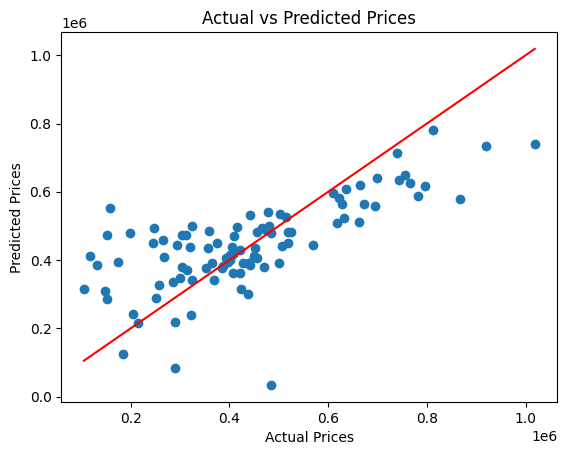

In [28]:
import matplotlib.pyplot as plt
# Plotting the results
plt.scatter(test_Y, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], color='red')  # Diagonal line
plt.show()

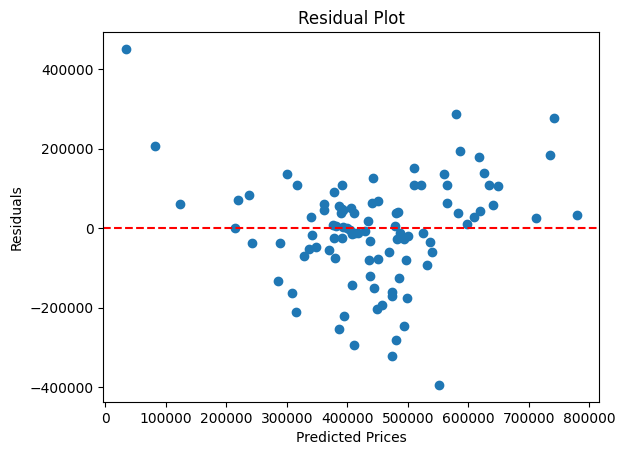

In [29]:
# Residual plot
residuals = test_Y - predictions
plt.scatter(predictions, residuals)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--')
plt.show()